# UK Net Zero

# Table of Contents
1. [Introduction](#Introduction)
    1. [How is the data created - methodology](#How-is-the-data-created---methodology)
    2. [TL;dr findings](#TL;dr-findings)
2. [Background to technical terms](#Background-to-technical-terms)
    1. [What are emissions?](#What-are-emissions?)
    2. [What is net zero? Net vs gross zero](#What-is-net-zero?-Net-vs-gross-zero)
    3. [UK's net zero targets](#UK's-net-zero-targets)
    4. [Carbon Capture, Utilisation & Storage (CCUS)](#Carbon-Capture,-Utilisation-&-Storage-(CCUS))
3. [How is the data created](#How-is-the-data-created)
4. [Users & uses](#Users-&-uses)
5. [Analysis](#Analysis)
6. [What have we learned](#What-have-we-learned)
7. [Aggregated data analysis](#Aggregated-CO2-emissions)
8. [Dis-aggregated data analysis](#Dis-aggregated-CO2-emissions)


## Introduction
The aim of this document is to look at the data published in the UK on the emissions of greenhouse gases. It provides an overview of what emissions are, what 'net-zero' is and talks about the data published and used in the UK.

Before delving into specifics, at a high level, the data is published on a yearly basis by the Office for National Statistics, as part of the UK National Accounts: [UK National Accounts, The Blue Book: 2020](https://www.ons.gov.uk/economy/grossdomesticproductgdp/compendium/unitedkingdomnationalaccountsthebluebook/2020). Although Environmental Accounts are "satelitte accounts" (meaning that they cover activities linked to the economy but are not part of the core UK national accounts), these do include information on atmospheric emissions, alongside others. The [latest emissions dataset](https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsatmosphericemissionsgreenhousegasemissionsbyeconomicsectorandgasunitedkingdom), titled "Atmospheric emissions: greenhouse gases by industry and gas" was published by the ONS on the 3rd of June 2021 and it includes data for the years 1990 to 2019.

At a lower level, the data is collected by and prepared by [Ricardo Energy & Environment](https://ee.ricardo.com/). The estimates published in the National Atmospheric Emissions Inventory (NAEI) are re-packaged and used by the ONS in its datasets.

### How is the data created - methodology

The exact methodology is complex and inaccessible for the average person: the six documents making up the methodology are over 1000 pages in length and can be found on the NAEI website: [Report: UK Greenhouse Gas Inventory, 1990 to 2019: Annual Report for submission under the Framework Convention on Climate Change](https://naei.beis.gov.uk/reports/reports?report_id=1015). Similar to the datasets themselves, these are also updated yearly to reflect any changes in the state-of-the-art employed by Ricardo EE in producing the data.

The sources used by Ricardo Energy & Environment provide data data on air emissions, which is then calculated from activity data and emissions factors, where 

$Emission = Factor \; x \; Activity $

For example, a factor can be the emission factor for diesel and an activity the distance in kilometers driven by cars. The ONS applies 'the residence principle' to the datasets - this means that for certain specific industries, emissions are not included in the datasets as they were not produced in the UK or by UK businesses.

Moreover, the "estimates for emissions made by each industry are made on the basis of which industry is the primary emitter and which industry owns the unit creating the emissions". The example given by the ONS is straightforward: "if a retailer owns a fleet of trucks that deliver stock to its stores, the emissions from those trucks would go to the retail industry. However, if the retailer hires a separate freight company to deliver its goods, the emissions would go to the road freight industry".

Confusingly, for each of these specific sources, there are colour coded estimated uncertainty ratings. These relate to the allocation to industry group, are in addition to the uncertainty used by the NAEI estimates and do not include any uncertainty introduced by the residency principle mentioned above.

Whilst the methodology might change, the ONS revises the published datasets in line with any such revision. The ONS' website explains: 
> Statistics are most often revised for 1 of 2 reasons:
> 1. For certain statistics initial estimates are released with the expectation that these may be revised and updated as further data becomes available.
> 2. Revisions may also be made when methods or systems are changed.

ONS is publishing their methodology in the [Environmental accounts on air emissions QMI
](https://www.ons.gov.uk/economy/environmentalaccounts/methodologies/environmentalaccountsonairemissionsqmi) document.

### TL;dr findings

On average, for the period 1990 to 2018, there has been a reduction in CO2 emissions of ~1.01% per year. This was worked out from the yearly percentage change in CO2 and then averaged over the number of years in the dataset.

Notwithstanding other types of greenhouse gases, if the UK were to follow this descending trend for the next 16 years (2019 to 2035), we would reach our assumed target of 78% of CO2 emissions compared to the levels of 1990.

Unfortunately, this approximation does not account for the rest of the greenhouse gases which have different Global Warming Potential (GWP). 

Figure 2. below shows a plot line of the year 1990 to 2035, with the last 16 years portraying a straight downwards slope for the CO2 emissions.


## Background to technical terms

### What are emissions?
Emissions refer to the the pollutans humans release in the atmosphere through their activities. These range from greenhouse gases (such as CO2, HFC or methane), air pollutants (CO, black smoke or benzene), heavy metals (arsenic, mercury or lead) or particulate matter (PM10, PM2.5, PM1 or PM0.1). BEIS' [Inventory Tool](https://naei.beis.gov.uk/data/data-selector?view=pms) provides data on all of these.

Carbon is usually the main reference to emissions in the media. That is mainly because [5 million metric tons of carbon produced by humans remains in the atmosphere each year. This raises the global average amount of CO2 by 2.3 part per million every year. This means that, since 1750, humans have increased the amount of CO2 in the atmosphere by 50%](https://www.climate.gov/news-features/climate-qa/are-humans-causing-or-contributing-global-warming#:~:text=A%20net%205%20billion%20metric,atmosphere%20by%20nearly%2050%20percent.). 

The Kyoto Protocol, which entered into force in 2005, establishes the [UN Framework Convention on Climate Change](https://unfccc.int/process-and-meetings/the-convention/what-is-the-united-nations-framework-convention-on-climate-change) for industrialised economies to limit and reduce their greenhouse gases emissions. 

Besides CO2, [methane (CH4)](https://grist.org/article/un-report-ipcc-methane-cows-oil/) is also worth mentioning. This is a powerful greenhouse gas and its main source (from human activity) comes from agriculture. Compared to CO2, methane has a relatively short atmospheric lifetime (around 12 years, versus hundreds of years for CO2), but it absorbs more energy during its lifetime. 

The latest [IPCC report discusses CH4 at length](https://www.ipcc.ch/report/ar6/wg1/) and mentions that “strong, rapid and sustained reductions in CH4 emissions would also limit the warming effect resulting from declining aerosol pollution and would improve air quality”. A useful methane tracker can be found [here](https://www.iea.org/reports/methane-tracker-2020).

While CO2 is the main culprit behind climate change, the same IPCC study suggest that 30-50% of temperature rises are caused by CH4. In simpler terms, while methane dissipates quite quickly from the atmosphere, it is accentuating the effects of CO2 on climate change.


### What is net zero? Net vs gross zero

Although a broad term, this has been highly used in the public space over the past few years and more so recently. It refers to the reduction of greenhouse gas emissions combined with the removal of such gases from the atmosphere. This is discussed on the [government's website](https://www.gov.uk/government/news/uk-enshrines-new-target-in-law-to-slash-emissions-by-78-by-2035).

This is in contrast to gross zero, which refers to reducing all greenhouse gas emissions to zero. Net zero recognises this is a potentially unrealistic goal, as some industries will continue to emit such gases.

To allow net zero to be a viable route, the gases emitted by more polluting industries will need to be offset, through means such as natural carbon sinks or as artificial carbon sinks. As research into these artifical technologies is ongoing, the focus is on using natural carbon sinks to capture these gases, using, for e.g., oceans and forests.

When the carbon produced is cancelled out by the carbon removed, the UK will be a net zero emitter, which becomes easier as emissions lower further down.


### UK's net zero targets 

"The UK government will set the world’s most ambitious climate change target into law to reduce emissions by 78% by 2035 compared to 1990 levels, it was [announced today (Tuesday 20 April)"] (https://www.gov.uk/government/news/uk-enshrines-new-target-in-law-to-slash-emissions-by-78-by-2035).

In June 2019, the UK Government passed laws to bring all greenhouse gas emissions to net zero by 2050. Compared to different pledges made throughout the years, this is a legally binding target to achieve 'net zero' by 2050 and it outlined the Government's definition of net zero:

> any emissions would be balanced by schemes to offset an equivalent amount of greenhouse gases from the atmosphere, such as planting trees or using technology like carbon capture and storage.

The legislation put in place by the Government is covered under The Climate Change Act:

Originally passed in 2008, and amended in 2019, it commits the UK to 'net zero' by 2050. In 2018, The Grantham Institute published a report of the impact of the act in its first ten years. This noted "“there are no outright failures and often the problems are not with the act itself, but with the way policymakers have acted under the framework it created”.

In addition to the Climate Change Act, other policy initiatives have been introduced to meet net zero. These include:

* Emission Trading Scheme
* Fuel duty tax
* Contracts for Difference
* Energy Company Obligation
* Climate Change Levy

The UK is due to publish its net zero strategy before the COP26 summit in November 2021. This strategy needs to be more than just words: it needs to be backed by data and to feed back data, in a timely manner.

### Carbon Capture, Utilisation & Storage (CCUS)

CCUS is a new technology the British government expects to help the transition to net zero. As the name suggests, it consists of capture, utilisation and storage, whereby we can continue using polluting fossil fuels, capture their emissions, use the captured emissions to push out more fossil fuels from within the ground and then storage the carbon in the spaces left from the harvest of fossil fuels.

There will be a £1bn UK-wide funding available to support the establishment of this tech, in four industrial clusters, with the hope of removing 10Mt of CO2 per year by 2030. 

IEA's Technologies Perspectives 2020 report mentions 21 operational CCUS plants, worldwide, with a combined CO2 capture capacity of 39.8 Mt/year. For context, in 2019, the world has emitted 36.44bn tonnes of CO2, so all the CCUS plants are able to absorb 0.1% of all the CO2 emitted.

The Global CCS Institute (CO2RE.co) mentions 57 operational CCS facilities, most of them being pilot & demonstation plants. Unfortunately, they do not provide the capacity of each plant to allow any contextualization.

Data on the potential CCUS sites in the UK are available on the CO2Stored website. The website requires a subscription offered by BGS, with free plans available for researchers. Since most, if not all, of the sites on the CO2Stored website are potential storage facilities, the only data available is on their potential storage capacity and their location.


## How is the data created

To understand how this data is created, we have been in touch with the data producer (Ricardo EE), followed the methodology published by the ONS ([^0]) and tried to understand the Greenhouse Gas Inventory published by Ricardo. The latter is a long document aimed at professional and as such it is extremely difficult to read and understand. 

A good question would be should Ricardo EE and the ONS create a simple explanation for the methodology such researchers and other interested parties can quickly and easily understand what is happening?

We have contacted the ONS to discuss a series of questions we have prepared after analysing their published dataset, but at the time this notebook was created, an interview was not agreed upon.

## Users & uses

The [QMI documents published by the ONS](https://www.ons.gov.uk/economy/environmentalaccounts/methodologies/environmentalaccountsonairemissionsqmi) discusess the potential users and what they might use the published datasets for. In addition to the mandatory requirement to submit the data to Eurostat, other potential users are international organisations, the UK and other governments, and the research community. 

Whilst any specific users, besides the UK government, are not mentioned, it would be interesting and beneficial to hear from the community the ODI reaches to, to understand if these datasets, and their timeliness, is sufficient. 

There is a small discussion on what the data can be used for, albeit this is coupled to the economy and its growth. It is unclear what other uses, if any, the community has for the datasets, although it might come in handy to link to the economic traction and detraction as part of the transition to a greener economy. This would potentially need more data sources and a wider analysis, but once contextualised, it would offer a wider picture of the transition's outcomes.

## Analysis

Considering the amount of data available, the analysis consisted in trying to make sense of the dataset published by the ONS. As such, we can report that:

* the dataset is published as an Excel spreadsheet and it is updated on a yearly basis
* the spreashet is divided into eight individual sheets, the first one being an aggregate of all GHG emissions
* the analysis was done on the CO2 emissions and so the rest of the gases have not been included in the analsysis

From the 1990 to 2018 reported CO2 emissions, we have worked out that the highest increase year-on-year in emissions was from 1995 to 1996, an increase of ~4.49% and the highest year-on-year decrease was from 2008 to 2009, ~8.63%. 

Working on the difference between each year and averaging the amount for the number of years, the average percentage change for the period included in the dataset is -1.01%, effectively a 1.01% reduction in CO2 emissions.

Whilst a 1.01% reduction in CO2 emissions can be observed from this dataset, this is by no means sufficient for the UK to achieve its aims. The Climate Change Committe said the UK is not on track to meet its targets outlined by the [fourth and fifth carbon budgets (51% reduction by 2025 namely, 57% reduction by 2030)](https://www.theccc.org.uk/about/our-expertise/advice-on-reducing-the-uks-emissions/). Additionaly, the Institute for Government outline, in a report from September 2019, several requirements for the Government to meet net zero:

* a practical, coherent plan, which sets out how the UK will achieve emissions reductions, sector by sector
* consistent policy & regulatory frameworks in each sector
* governmental-wide coordination
* cost minimisation and fair allocation, whilst maintaining competitiveness
* making key decisions on net zero, developing policies and implementing them
* developing processes that build public & political consent for measures before they are introduced
* holding the Government accountable by the Parliament & other bodies

## What have we learned

The learnings from this exercise come twofold: in how the data is created, processed, served, and used as well as the data itself, in terms of amount of GHG etc.

Firstly, the ONS and Ricardo E&E are doing a good job at providing a simple interface to access the data. The methodology used to create it is not accessible for the common person, so it is nice to have a simplistic view of the data in one Excel spreadsheet. 

On the other hand, the data is produced and published once a year, for the previous year. While provisional datasets are sometimes made available, this has the potential to reduce the efficiency of any research based on these datasets. Moreover, in addition to the ONS datasets, the NAEI inventory provides more in-depth data, which is sometimes different to the data used in the ONS datasets, when considering the assumptions and corrections these institutions make. 

It might be important to note that annual reporting is the international standard set by the IPCC and UNFCCC and that on the topic of reporting frequency, Peter Brown from Ricardo EE notes that "Temporal resolution isn’t a topic I’ve been asked about often, so I assume this reflects a low demand for higher resolution. The main example I can think of where it might add value would be to improve comparisons with the inverse modelling conducted by the Met Office and Bristol University [...]" Perhaps for the moment the need for higher frequency reporting does not exist, but it would be interesting to see what the effects this would have on data usage: who, why and how would use frequent data?

Notwithstanding these, a certain problem remains: the data is usually available only in the form of spreadsheets, and when not, it is hidden behind not-so-user-friendly tools (the Data Selector on the NAEI website), which is prone to human errors when accessing the data. Whilst these can be easily fixed (by fetching the data again), it would be nice to provide access to documented APIs for automated data fetching.

Secondly, we have learned how the GHG emissions have varried from 1990 to 2019. The graphs in the rest of the notebook do a better job at explaining how emissions have varried than words could. In addition, we have seen that, on average, there has been a 1.01% reduction in greenhouse gas emissions.

Lastly, the notebook itself can be easily adapted and thus be used for next years' datasets. This would allow simple yet effective comparisons between the assumptions (and therefore the results) behind this exercise, and the real world values recorded by Ricardo and published by the ONS.

### Aggregated CO2 emissions

In [98]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
# Create a pandas DataFrame based on the information on the sheet titled "CO2" in the speadsheet
df_co2 = pd.read_excel("data_sources/atmos_emis_ghg.xlsx", sheet_name="CO2")

In [3]:
# Remove any unnecessary columns and rows, and reset the index for easier analsysis
temp_frame = df_co2.copy(deep=True).iloc[[2, 25]]
temp_frame.reset_index();
temp_frame.drop(columns=temp_frame.columns[:3], inplace=True)

In [4]:
# Invert the columns and rows by transposing the dataframe and rename the columns
# Update the data type of the data in the Yar column to integer to ignore any decimal point
transposed_overview = temp_frame.transpose(copy=True)
transposed_overview.rename(columns={2: "Year", 25: "CO2e"}, inplace=True)
transposed_overview.reset_index(drop=True);
transposed_overview['Year'] = transposed_overview['Year'].astype('int')

In [5]:
# Print the created frame
transposed_overview

,Year,CO2e
Unnamed: 3,1990,637165.2
Unnamed: 4,1991,646096.2
Unnamed: 5,1992,631454.6
Unnamed: 6,1993,618872.8
Unnamed: 7,1994,616015.1
Unnamed: 8,1995,610099.7
Unnamed: 9,1996,637549.4
Unnamed: 10,1997,612855.6
Unnamed: 11,1998,621289.2
Unnamed: 12,1999,615051.9


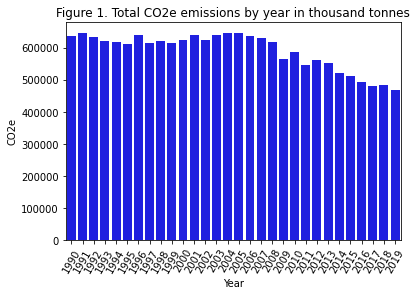

In [6]:
# Generate a bar graph for the information in the dataset
graph = sns.barplot(
    x="Year",
    y="CO2e",
    data=transposed_overview,
    color='blue'
)

graph.set_xticklabels(graph.get_xticklabels(), rotation=60);
graph.set_title("Figure 1. Total CO2e emissions by year in thousand tonnes");

In [7]:
# Calculate the percentage change between each year in the frame
transposed_overview['pct_change'] = transposed_overview.CO2e.pct_change()

In [8]:
# Find the largest positive percentage change in the dataset and output it
max_diff_positive_row_name = transposed_overview['pct_change'].idxmax()
max_diff_positive_row = transposed_overview.loc[max_diff_positive_row_name,:]
max_diff_positive_row

Year              1996
CO2e          637549.4
pct_change    0.044992
Name: Unnamed: 9, dtype: object

In [9]:
# Find the largest negative percentage change in the dataset and output it
max_diff_negative_row_name = transposed_overview['pct_change'].idxmin()
max_diff_negative_row = transposed_overview.loc[max_diff_negative_row_name,:]
max_diff_negative_row

Year              2009
CO2e          564075.8
pct_change    -0.08632
Name: Unnamed: 22, dtype: object

In [10]:
# Calculate the mean of all year-on-year percentage changes and output the result
transposed_overview['pct_change'].mean()

-0.010104327184030001

Figure 1 above shows the quantity of CO2e emitted in the UK every year from 1990 to 2019.

For the period 1990 to 2019, the CO2 emissions in the UK fell, on average, 1.01% year-on-year.

The largest increase YoY in CO2 emissions was recorded in 1996, namely a 4.49% increase on 1995 levels.

The largest decrease YoY in CO2 emissions was recorded in 2009, where the levels of carbon dioxide emissions decreased by 8.63% compared to 2008 levels.

---
UK's Net Zero strategy requires a reduction of emissions to 78% of 1990 levels by 2035. Following the average of 1.01% YoY reduction in emissions (and thereby assuming nothing will change and thus everything remains as it is), we can work out the emissions the UK is due to produce over the next 14 years.

In [11]:
# Based on the average change, create values for the next 16 years and add them to a list
last_value_in_emissions = transposed_overview.at['Back to contents', 'CO2e']
next_sixteen_yrs_emissions = []
for i in range(16):
    last_value_in_emissions = last_value_in_emissions + transposed_overview['pct_change'].mean() * last_value_in_emissions
    next_sixteen_yrs_emissions.append(last_value_in_emissions)

In [12]:
# Print out the next 16 yrs of CO2 emissions
next_sixteen_yrs_emissions

[463544.3860835712,
 458860.5819422625,
 454224.10449046345,
 449634.47552381875,
 445091.22166990634,
 440593.874339414,
 436141.96967780916,
 431735.04851749726,
 427372.6563304634,
 423054.3431813924,
 418779.6636812627,
 414548.1769414092,
 410359.44652805,
 406213.0404172731,
 402108.5309504774,
 398045.4947902641]

In [13]:
# Create a new DataFrame for the period 2020 to 2036 and the emissions previously calculated
next_sixteen_yrs_df = pd.DataFrame(data={"Year": list(range(2020, 2036)), "CO2e": next_sixteen_yrs_emissions})

In [14]:
# Round the emissions to one decimal point 
next_sixteen_yrs_df = next_sixteen_yrs_df.round(decimals=1)

In [15]:
next_sixteen_yrs_df

,Year,CO2e
0,2020,463544.4
1,2021,458860.6
2,2022,454224.1
3,2023,449634.5
4,2024,445091.2
5,2025,440593.9
6,2026,436142.0
7,2027,431735.0
8,2028,427372.7
9,2029,423054.3


In [16]:
# Get 1990's emissions in CO2
# 1990's emissions: 637165.2 Thousand Tonnes
transposed_overview.reset_index().at[0, "CO2e"]

# Calculate 78% of 1990 levels as required by the Net Zero targets the UK has set
# 78% of 637165.2
78/100 * 637165.2

496988.85599999997

From the above approximation, based on a year-on-year reduction in emissions of ~1.01%, the UK should be able to reach its Net Zero goals (78% of 1990's emissions levels) by 2035.

It is important to point out this approximation is incomplete and it is not accounting for different changes in the UK. As the next section will show, there are industries where the CO2 emissions have steadily increasing for the past few years. Moreover, these figures are dependant on many factors, for example, population numbers. 

In [17]:
# Create a concatenated frame for the entire period 1990 to 2035
entire_period_df = pd.concat([transposed_overview, next_sixteen_yrs_df])

In [18]:
# Reconstruct the dataframe to ignore any unecessary information 
# and so focus just on the year and the emissions quantity
reconstructed_entire_period_df = pd.DataFrame(data={"Year": list(entire_period_df.Year), "CO2e": list(entire_period_df.CO2e)})

In [19]:
reconstructed_entire_period_df

,Year,CO2e
0,1990,637165.2
1,1991,646096.2
2,1992,631454.6
3,1993,618872.8
4,1994,616015.1
5,1995,610099.7
6,1996,637549.4
7,1997,612855.6
8,1998,621289.2
9,1999,615051.9


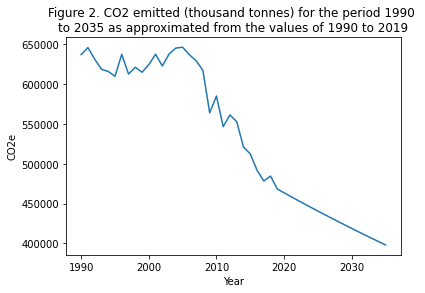

In [20]:
# Create a bar graph of the entire 45 year period
graph = sns.lineplot(
    x="Year",
    y="CO2e",
    data=reconstructed_entire_period_df,
)

# graph.set_xticklabels(graph.get_xticklabels(), rotation=60);
graph.set_title("Figure 2. CO2 emitted (thousand tonnes) for the period 1990 \nto 2035 as approximated from the values of 1990 to 2019");

---
### Dis-aggregated CO2 emissions

In [97]:
# Process data for making the graphs
industries = df_co2.copy(deep=True).iloc[list(range(2,24))]
industries.reset_index();
industries.drop(columns=industries.columns[:2], inplace=True)
industries = industries.transpose(copy=True)
industries.columns = industries.iloc[0]
industries.drop(industries.index[0], inplace=True)
industries.rename(columns={np.nan: "Year"}, inplace=True)
industries.reset_index(drop=True);
industries['Year'] = industries['Year'].astype('int')

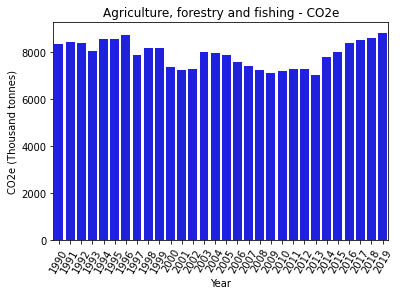

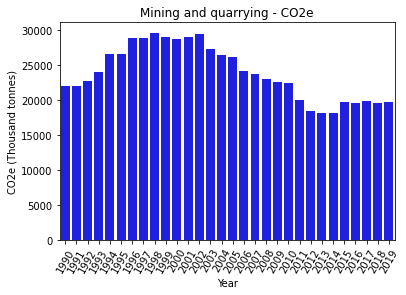

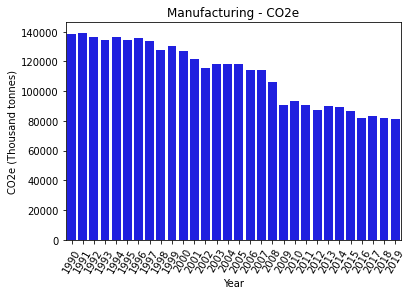

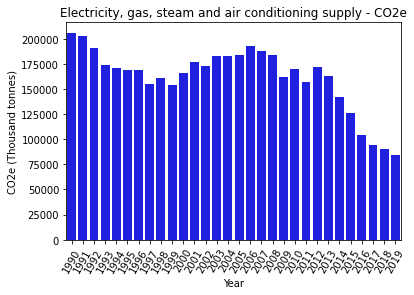

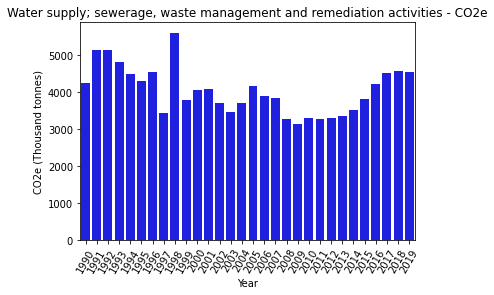

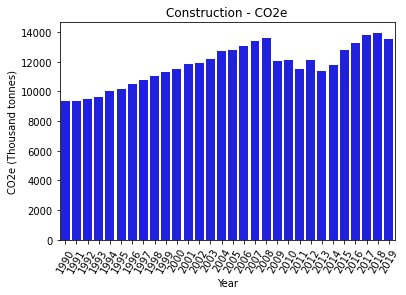

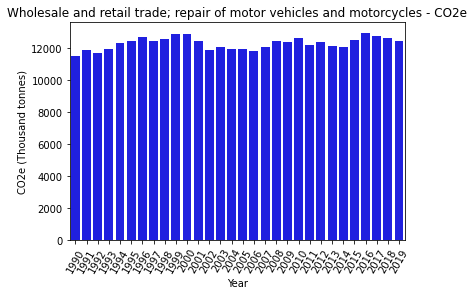

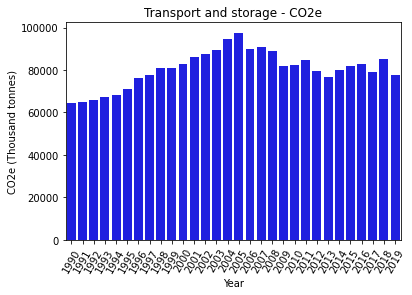

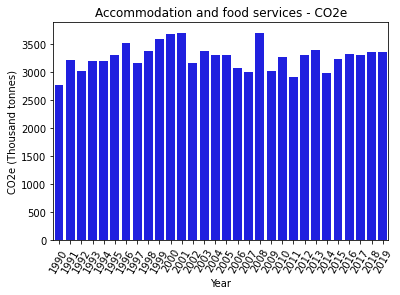

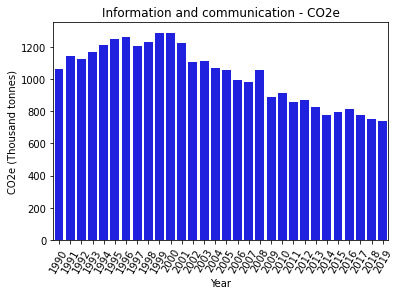

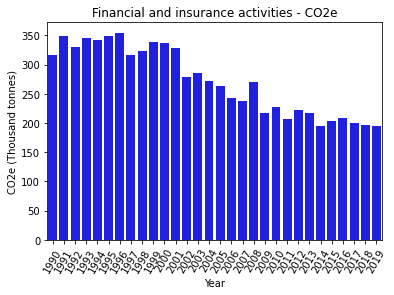

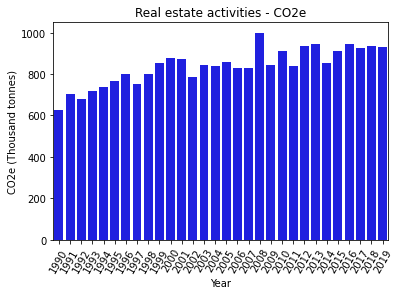

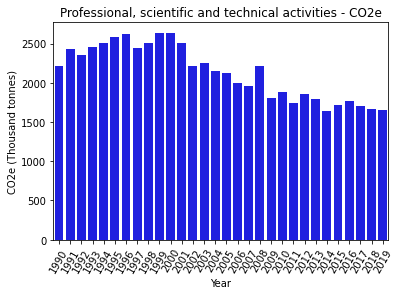

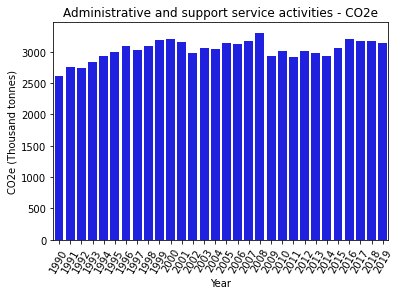

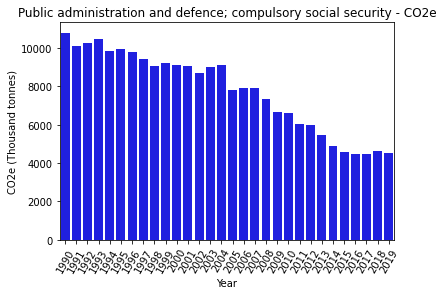

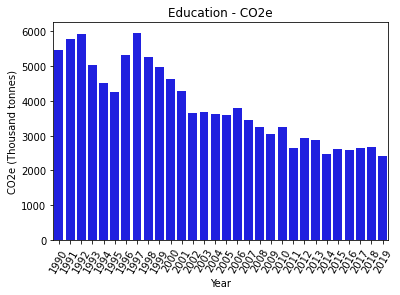

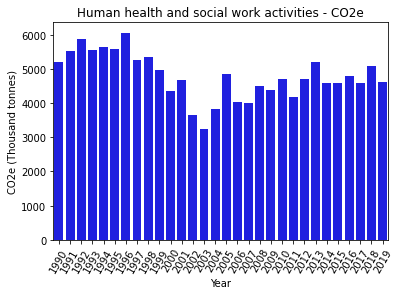

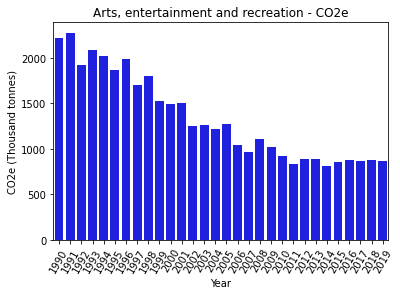

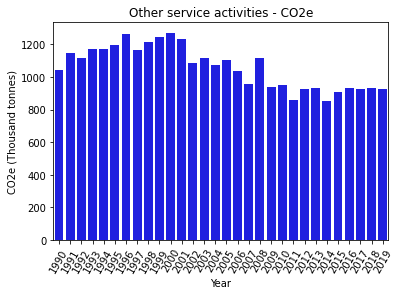

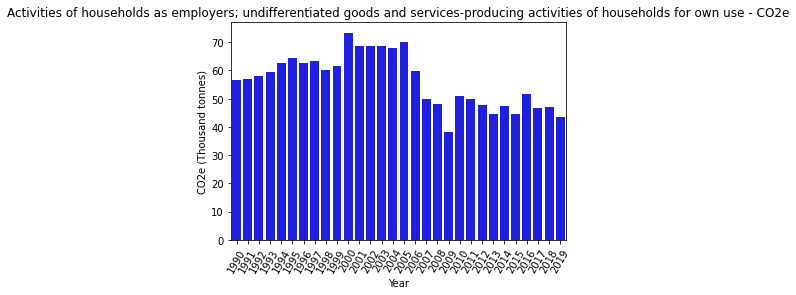

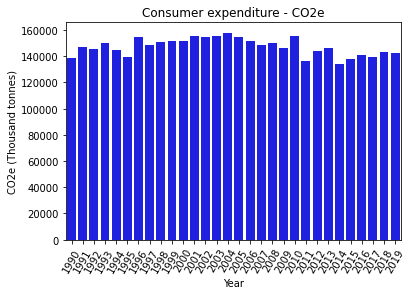

In [99]:
labels = list(industries.columns)[1:]
for label in labels:
    plt.figure()
    graph = sns.barplot(
    x="Year",
    y=label,
    data=industries,
    color='blue'
)
    graph.set_title(f"{label} - CO2e")
    graph.set_ylabel("CO2e (Thousand tonnes)")
    graph.set_xticklabels(graph.get_xticklabels(), rotation=60);

In [137]:
# Prepare data for dataframe
# Calculate percentage change mean, max increase 
# and max decrease for each industrye
analysed_data = []
for column in industries.columns[1:]:
    industry = industries[column]
    pct_change = industry.pct_change()
    result = {
        "industry_name": industry.name,
        "pct_change_mean": pct_change.mean(),
        "max_increase": pct_change.max(),
        "max_decrease": pct_change.min(),
    }
    analysed_data.append(result)
    

In [138]:
# Create dataframe with industry, pct_change_mean, max increase & decrease
industry_df = pd.DataFrame.from_dict(analysed_data)

In [139]:
industry_df

,industry_name,pct_change_mean,max_increase,max_decrease
0,"Agriculture, forestry and fishing",0.002858,0.105040,-0.099060
1,Mining and quarrying,-0.002731,0.107534,-0.108463
2,Manufacturing,-0.017667,0.032207,-0.146110
3,"Electricity, gas, steam and air conditioning s...",-0.028149,0.091821,-0.169507
4,"Water supply; sewerage, waste management and r...",0.013395,0.639039,-0.323075
5,Construction,0.013581,0.085678,-0.114917
6,Wholesale and retail trade; repair of motor ve...,0.003034,0.038096,-0.047548
7,Transport and storage,0.007483,0.078336,-0.087272
8,Accommodation and food services,0.010837,0.235353,-0.187052
9,Information and communication,-0.010974,0.078316,-0.162234
